<a href="https://colab.research.google.com/github/550tealeaves/DATA-70500-working-with-data/blob/main/HW3_MergingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Merging Data Sources

To demonstrate the merging of data sources, I will use four cigarette tax datasets, all of which contain the same four variables - State, tax (cents/pack), region, and rank. I will use State as the index to join the files together.
I'm using the **concat()** function with the **axis=1** flag in order to add variables rather than cases.

I use the **na_values[np.nan]** flag to deal with missing values in the csv files. When I create the analytical model, I use the **missing='drop'** flag to exclude those cases from the analysis.

Granted, there is no missing data.

In [ ]:
# Code block 1a: Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
# Code block 2a: Reading CSV file
# State = index
# Also tell what they should do w/ n/a
Cig2004 = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/refs/heads/main/datasets/cigarette%20taxes_2004.csv', index_col='STATE', na_values=[np.nan])
Cig2004.head()

,TAX (cents/pack),RANK,REGION
STATE,,,
AK,100.0,12,4
AL,16.5,47,2
AR,59.0,27,2
AZ,118.0,11,4
CA,87.0,19,4


In [ ]:
# Code block 2b: Reading 2nd CSV file
Cig2020 = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/refs/heads/main/datasets/cigarette%20taxes_2020.csv', index_col='STATE', na_values=[np.nan])
Cig2020.head()

,TAX (cents/pack),RANK,REGION
STATE,,,
AK,200.0,17.0,4.0
AL,67.5,41.0,2.0
AR,115.0,35.0,2.0
AZ,200.0,17.0,4.0
CA,287.0,11.0,4.0


In [ ]:
# Code block 2c: Reading a third CSV file
# Use the raw content URL for the CSV file.
Cig2010 = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/main/datasets/cigarette%20taxes_2010.csv', index_col='STATE', na_values=[np.nan])
Cig2010.head()

,TAX (cents/pack),RANK,REGION
STATE,,,
AK,200.0,11,4
AL,42.5,46,2
AR,115.0,27,2
AZ,200.0,11,4
CA,87.0,32,4


In [ ]:
# Code block 2d: Reading a fourth CSV file
# Use the raw content URL for the CSV file.
Cig2001 = pd.read_csv('https://raw.githubusercontent.com/550tealeaves/DATA-70500-working-with-data/main/datasets/cigarette%20taxes_2001.csv', index_col='STATE', na_values=[np.nan])
Cig2001.head()

,TAX (cents/pack),RANK,REGION
STATE,,,
AK,100,2,4
AL,17,42,2
AR,32,28,2
AZ,58,15,4
CA,87,4,4


Here, we will combine the three new DataFrames we've just created into a new DataFrame by concatinating the parts. The flag, **axis=1**, allows us to stack the three files side-by-side, as it were, rather than on top of each other. We can do this because all of them are indexed by State. We can now use variables from any of the data sources in our analysis.

In [ ]:
# Code block 3: Merging the DataFrames using the concat method in pandas
# indexed all files by state and uses concat method to combine them
CigTotal = pd.concat([Cig2001, Cig2004, Cig2010, Cig2020], axis=1)
CigTotal.head() # shows new measures added

,TAX (cents/pack),RANK,REGION,TAX (cents/pack),RANK,REGION,TAX (cents/pack),RANK,REGION,TAX (cents/pack),RANK,REGION
STATE,,,,,,,,,,,,
AK,100.0,2.0,4.0,100.0,12.0,4.0,200.0,11.0,4.0,200.0,17.0,4.0
AL,17.0,42.0,2.0,16.5,47.0,2.0,42.5,46.0,2.0,67.5,41.0,2.0
AR,32.0,28.0,2.0,59.0,27.0,2.0,115.0,27.0,2.0,115.0,35.0,2.0
AZ,58.0,15.0,4.0,118.0,11.0,4.0,200.0,11.0,4.0,200.0,17.0,4.0
CA,87.0,4.0,4.0,87.0,19.0,4.0,87.0,32.0,4.0,287.0,11.0,4.0


In our model, we are trying to explain variation in state cigarette taxes, using rank and region as predictors. Various state policies on cigarette smoking impact cigarette taxes. We are aware of the health risks of cigarette smoke, but one can infer about how seriously states take those risks by the ease at which one can purchase packs of cigarettes.

In [ ]:
# Code block 4b: Using the merged data in a linear model
Y = CigTotal['TAX (cents/pack)'] # A measure of overall quality of life
X = CigTotal['REGION']
X = sm.add_constant(X)
model2 = sm.OLS(Y, X, missing='drop').fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:       TAX (cents/pack)   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.008026
Date:                Tue, 01 Oct 2024   Prob (F-statistic):              0.929
Time:                        15:41:04   Log-Likelihood:                -241.94
No. Observations:                  51   AIC:                             487.9
Df Residuals:                      49   BIC:                             491.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         41.7767      9.890      4.224      0.0

In [ ]:
# Code block 4b: Using the merged data in a linear model
Y = CigTotal['TAX (cents/pack)'] # A measure of overall quality of life
X = CigTotal['RANK']
X = sm.add_constant(X)
model3 = sm.OLS(Y, X, missing='drop').fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:       TAX (cents/pack)   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     886.5
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           4.85e-33
Time:                        15:41:45   Log-Likelihood:                -166.74
No. Observations:                  51   AIC:                             337.5
Df Residuals:                      49   BIC:                             341.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.8920      1.830     49.111      0.0

In [ ]:
# Code block 4: Using the merged data in a linear model

# Ensuring Y is a Series
Y = CigTotal['TAX (cents/pack)'] # A measure of overall quality of life

X = CigTotal[['RANK', 'REGION']]
X = sm.add_constant(X)
model0 = sm.OLS(Y, X, missing='drop').fit()
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:       TAX (cents/pack)   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     434.8
Date:                Tue, 01 Oct 2024   Prob (F-statistic):           1.76e-31
Time:                        15:35:55   Log-Likelihood:                -166.70
No. Observations:                  51   AIC:                             339.4
Df Residuals:                      48   BIC:                             345.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.3519      2.798     31.937      0.0

### **Summary**
- Prob f-statistics is less than alpha=0.05, so the model is statistically significant
-  Goodness of fit test, R-squared, reveals that approximately 95% of the variation in cigarette taxes can be explained by both the rank and region.
The p-values of the T-test statistic shows the Region is not statistically significant because the alpha>0.05. In fact, individual models above confirm that it is the rank that explains the variation; the region had a de minimis impact.
The p-values of rank (0.000) is statistically significant.

**For every unit increase in state rank, the cigarette tax decreases by 1.88 cents/pack.**







In [ ]:
X.corr()

,const,RANK,REGION
const,NaN,NaN,NaN
RANK,NaN,1.000000,-0.004426
REGION,NaN,-0.004426,1.000000


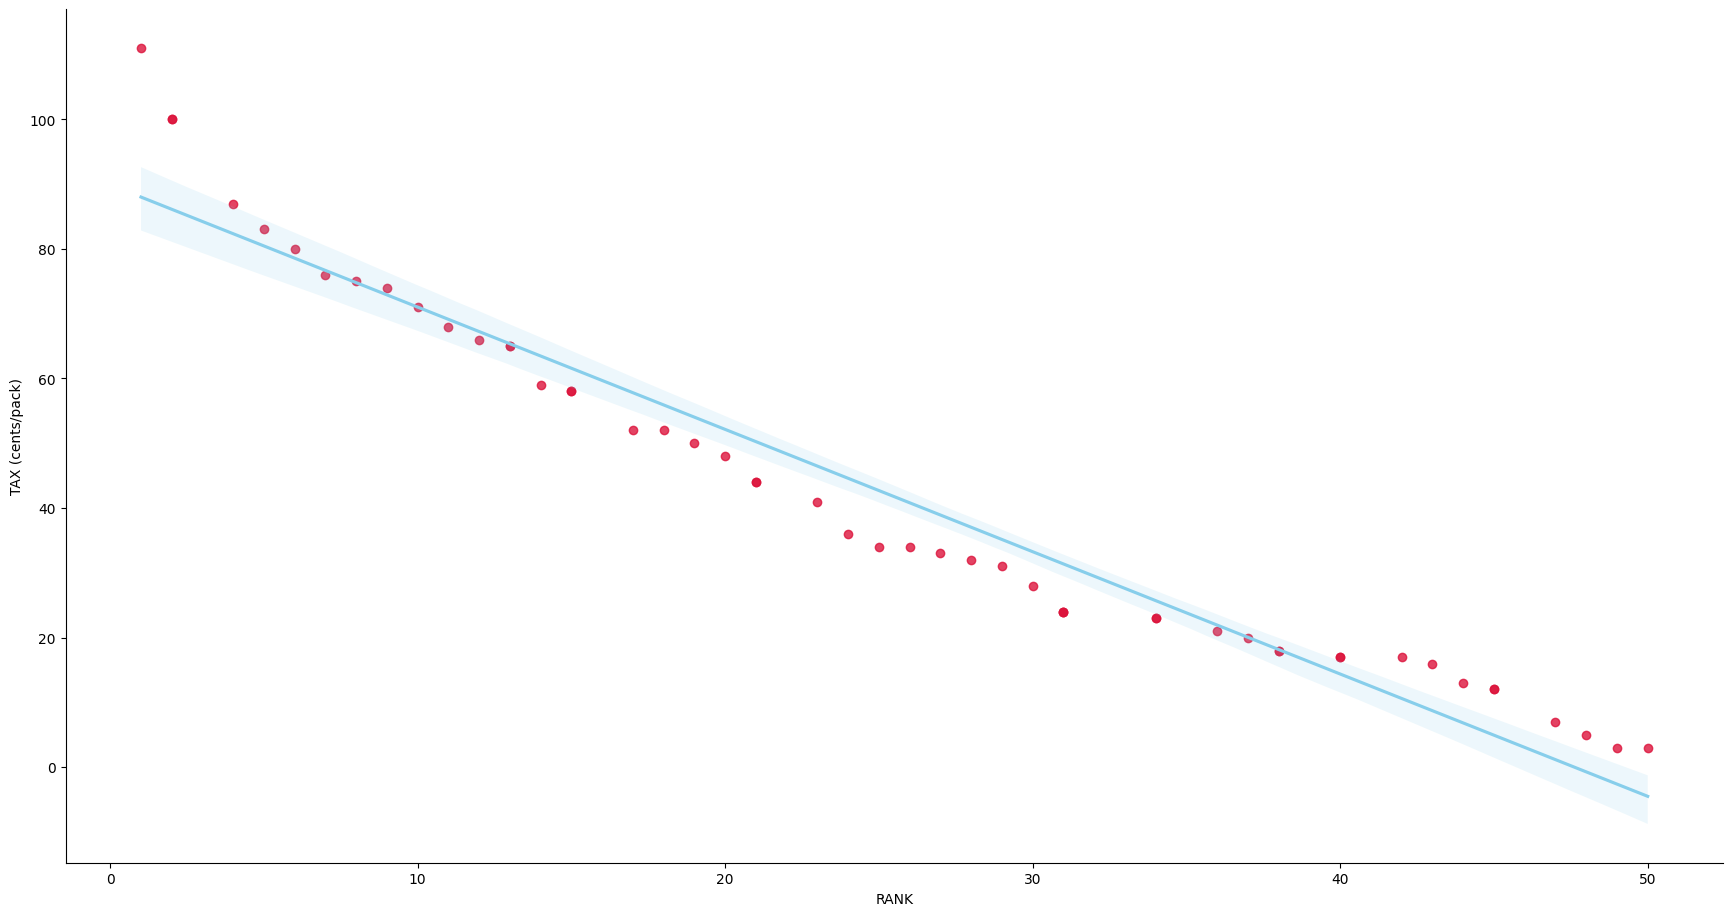

In [ ]:
#Visualizing the linear model w/ seaborn library & linear model plot
# Default is to show the confidence interval
# Richer countries have longer life expectancies
# Larger margin of error at 1 side of dataset

# Assuming your actual column names in CigTotal are 'TAX (cents/pack)' and 'RANK'
p = sb.lmplot(x='RANK', y='TAX (cents/pack)', data=CigTotal, scatter_kws={"color": "crimson"}, line_kws={"color": "skyblue"}) # added code to change colors of both data points and lines
p.fig.set_figwidth(20)
p.fig.set_figheight(10)
plt.show()

### Summary
The graph shows that as the state rank increases, the cigarette taxes decrease. Most states with the lowest ranks (biggest numbers) are located in the South and have the least taxes, and the states with the highest ranks (lowest numbers) are the most taxed.

## Data Cleaning
- not needed because the datasets are all numeric aside from state column

## Exercise

1. Read in these data files from the Department of Education or another data source, using the standardized school ID variable, as shown in the parts of code block 5.

2. Clean the data by converting the variables that should be numeric.

3. Create a linear model to explain some aspect of these education data.

4. Write a one paragraph explanation of the insights from your model.